# M2 Agentic AI - Chart Generation

In [53]:
# Standard library imports
import re
import json
import ollama

# Local helper module
import utils

In [79]:
df = pd.read_csv('coffee_sales.csv')
df.head()

,date,time,cash_type,card,price,coffee_name
0,2024-03-01,06:14,card,ANON-0000-0000-0001,3.87,Latte
1,2024-03-01,11:10,card,ANON-0000-0000-0002,3.87,Hot Chocolate
2,2024-03-01,11:19,card,ANON-0000-0000-0002,3.87,Hot Chocolate
3,2024-03-01,11:37,card,ANON-0000-0000-0003,2.89,Americano
4,2024-03-01,12:56,card,ANON-0000-0000-0004,3.87,Latte


In [80]:
# Use this utils.py function to load the data into a dataframe
df = utils.load_and_prepare_data('coffee_sales.csv')

# Grab a random sample to display
utils.print_html(df.sample(n=5), title="Random Sample of Coffee Sales Data")

date,time,cash_type,card,price,coffee_name,quarter,month,year
2024-07-07,11:56,card,ANON-0000-0000-0354,3.282,Cappuccino,3,7,2024
2024-12-09,14:14,card,ANON-0000-0000-0996,3.576,Cocoa,4,12,2024
2024-05-11,10:21,card,ANON-0000-0000-0026,3.772,Cocoa,2,5,2024
2025-03-20,06:46,card,ANON-0000-0000-1152,3.086,Americano with Milk,1,3,2025
2025-01-20,08:19,card,ANON-0000-0000-0141,2.596,Cortado,1,1,2025


In [81]:
df.to_csv('./coffee_sales.csv', index=False)

In [109]:
def generate_chart_code(instruction: str, out_path_v1: str, model='llama3.1') -> str:
    """Generate Python code to make a plot with matplotlib using tag-based wrapping."""

    prompt = f"""
    You are a data visualization expert.

    Return your answer *strictly* in this format:

    <execute_python>
    # valid python code here
    </execute_python>

    Do not add explanations, only the tags and the code.

    The code should create a visualization from a DataFrame 'df' with these columns:
    - date (M/D/YY)
    - time (HH:MM)
    - cash_type (card or cash)
    - card (string)
    - price (number)
    - coffee_name (string)
    - quarter (1-4)
    - month (1-12)
    - year (YYYY)

    User instruction: {instruction}

    Requirements for the code:
    1. Assume the DataFrame is already loaded as 'df'.
    2. Use matplotlib for plotting.
    3. Add clear title, axis labels, and legend if needed.
    4. Save the figure as '{out_path_v1}' with dpi=300.
    5. Do not call plt.show().
    6. Close all plots with plt.close().
    7. Add all necessary import python statements

    Return ONLY the code wrapped in <execute_python> tags.
    """

    response = utils.get_response(model, prompt)
    return response

In [110]:
instruction="Create a plot comparing Q1 coffee sales in 2024 and 2025 using the data in coffee_sales.csv", 
out_path_v1="chart_v1.png"

prompt = f"""
    You are a data visualization expert.

    Return your answer *strictly* in this format:

    <execute_python>
    # valid python code here
    </execute_python>

    Do not add explanations, only the tags and the code.

    The code should create a visualization from a DataFrame 'df' with these columns:
    - date (M/D/YY)
    - time (HH:MM)
    - cash_type (card or cash)
    - card (string)
    - price (number)
    - coffee_name (string)
    - quarter (1-4)
    - month (1-12)
    - year (YYYY)

    User instruction: {instruction}

    Requirements for the code:
    1. Assume the DataFrame is already loaded as 'df'.
    2. Use matplotlib for plotting.
    3. Add clear title, axis labels, and legend if needed.
    4. Save the figure as '{out_path_v1}' with dpi=300.
    5. Do not call plt.show().
    6. Close all plots with plt.close().
    7. Add all necessary import python statements

    Return ONLY the code wrapped in <execute_python> tags.
    """

In [111]:
# Define the conversation history
# The 'messages' parameter takes a list of dictionaries,
# each with a 'role' and 'content'
messages = [
    {
        'role': 'system',
        'content': 'You are a helpful assistant skilled at analyzing sales data.'
    },
    {
        'role': 'user',
        'content': prompt,
    }
]


In [112]:
# Define the model to use (ensure it has been pulled locally)
model = 'llama3.1'

# Define the conversation history
# The 'messages' parameter takes a list of dictionaries,
# each with a 'role' and 'content'

# Call the ollama.chat function
# The response is a dictionary object
response = ollama.chat(model=model, messages=messages)

# Print the model's response content
print(response['message']['content'])

<execute_python>
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('coffee_sales.csv')

# Filter Q1 data for 2024 and 2025
q1_2024 = df[(df['quarter'] == 1) & (df['year'] == 2024)]
q1_2025 = df[(df['quarter'] == 1) & (df['year'] == 2025)]

# Group by coffee name and calculate total sales for each quarter
q1_2024_sales = q1_2024.groupby('coffee_name')['price'].sum().reset_index()
q1_2025_sales = q1_2025.groupby('coffee_name')['price'].sum().reset_index()

# Plot the data
plt.figure(figsize=(10,6))
plt.bar(q1_2024_sales['coffee_name'], q1_2024_sales['price'], label='2024')
plt.bar(q1_2025_sales['coffee_name'], q1_2025_sales['price'], label='2025')

plt.title('Q1 Coffee Sales in 2024 and 2025')
plt.xlabel('Coffee Name')
plt.ylabel('Total Sales ($)')
plt.legend()

# Save the figure
plt.savefig('chart_v1.png', dpi=300)
plt.close()
</execute_python>


In [113]:
code_v1 = response['message']['content']

In [115]:
utils.print_html(code_v1, title="LLM output with first draft code")

In [116]:
print(code_v1)

<execute_python>
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('coffee_sales.csv')

# Filter Q1 data for 2024 and 2025
q1_2024 = df[(df['quarter'] == 1) & (df['year'] == 2024)]
q1_2025 = df[(df['quarter'] == 1) & (df['year'] == 2025)]

# Group by coffee name and calculate total sales for each quarter
q1_2024_sales = q1_2024.groupby('coffee_name')['price'].sum().reset_index()
q1_2025_sales = q1_2025.groupby('coffee_name')['price'].sum().reset_index()

# Plot the data
plt.figure(figsize=(10,6))
plt.bar(q1_2024_sales['coffee_name'], q1_2024_sales['price'], label='2024')
plt.bar(q1_2025_sales['coffee_name'], q1_2025_sales['price'], label='2025')

plt.title('Q1 Coffee Sales in 2024 and 2025')
plt.xlabel('Coffee Name')
plt.ylabel('Total Sales ($)')
plt.legend()

# Save the figure
plt.savefig('chart_v1.png', dpi=300)
plt.close()
</execute_python>


In [117]:
# Get the code within the <execute_python> tags
match = re.search(r"<execute_python>([\s\S]*?)</execute_python>", code_v1)
# if match:
#     initial_code = match.group(1).strip()
#     utils.print_html(initial_code, title="Extracted Code to Execute")
#     exec_globals = {"df": df}
#     exec(initial_code, exec_globals)

In [118]:
initial_code = match.group(1).strip()

In [119]:
print(initial_code)

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('coffee_sales.csv')

# Filter Q1 data for 2024 and 2025
q1_2024 = df[(df['quarter'] == 1) & (df['year'] == 2024)]
q1_2025 = df[(df['quarter'] == 1) & (df['year'] == 2025)]

# Group by coffee name and calculate total sales for each quarter
q1_2024_sales = q1_2024.groupby('coffee_name')['price'].sum().reset_index()
q1_2025_sales = q1_2025.groupby('coffee_name')['price'].sum().reset_index()

# Plot the data
plt.figure(figsize=(10,6))
plt.bar(q1_2024_sales['coffee_name'], q1_2024_sales['price'], label='2024')
plt.bar(q1_2025_sales['coffee_name'], q1_2025_sales['price'], label='2025')

plt.title('Q1 Coffee Sales in 2024 and 2025')
plt.xlabel('Coffee Name')
plt.ylabel('Total Sales ($)')
plt.legend()

# Save the figure
plt.savefig('chart_v1.png', dpi=300)
plt.close()


In [120]:
exec(initial_code)


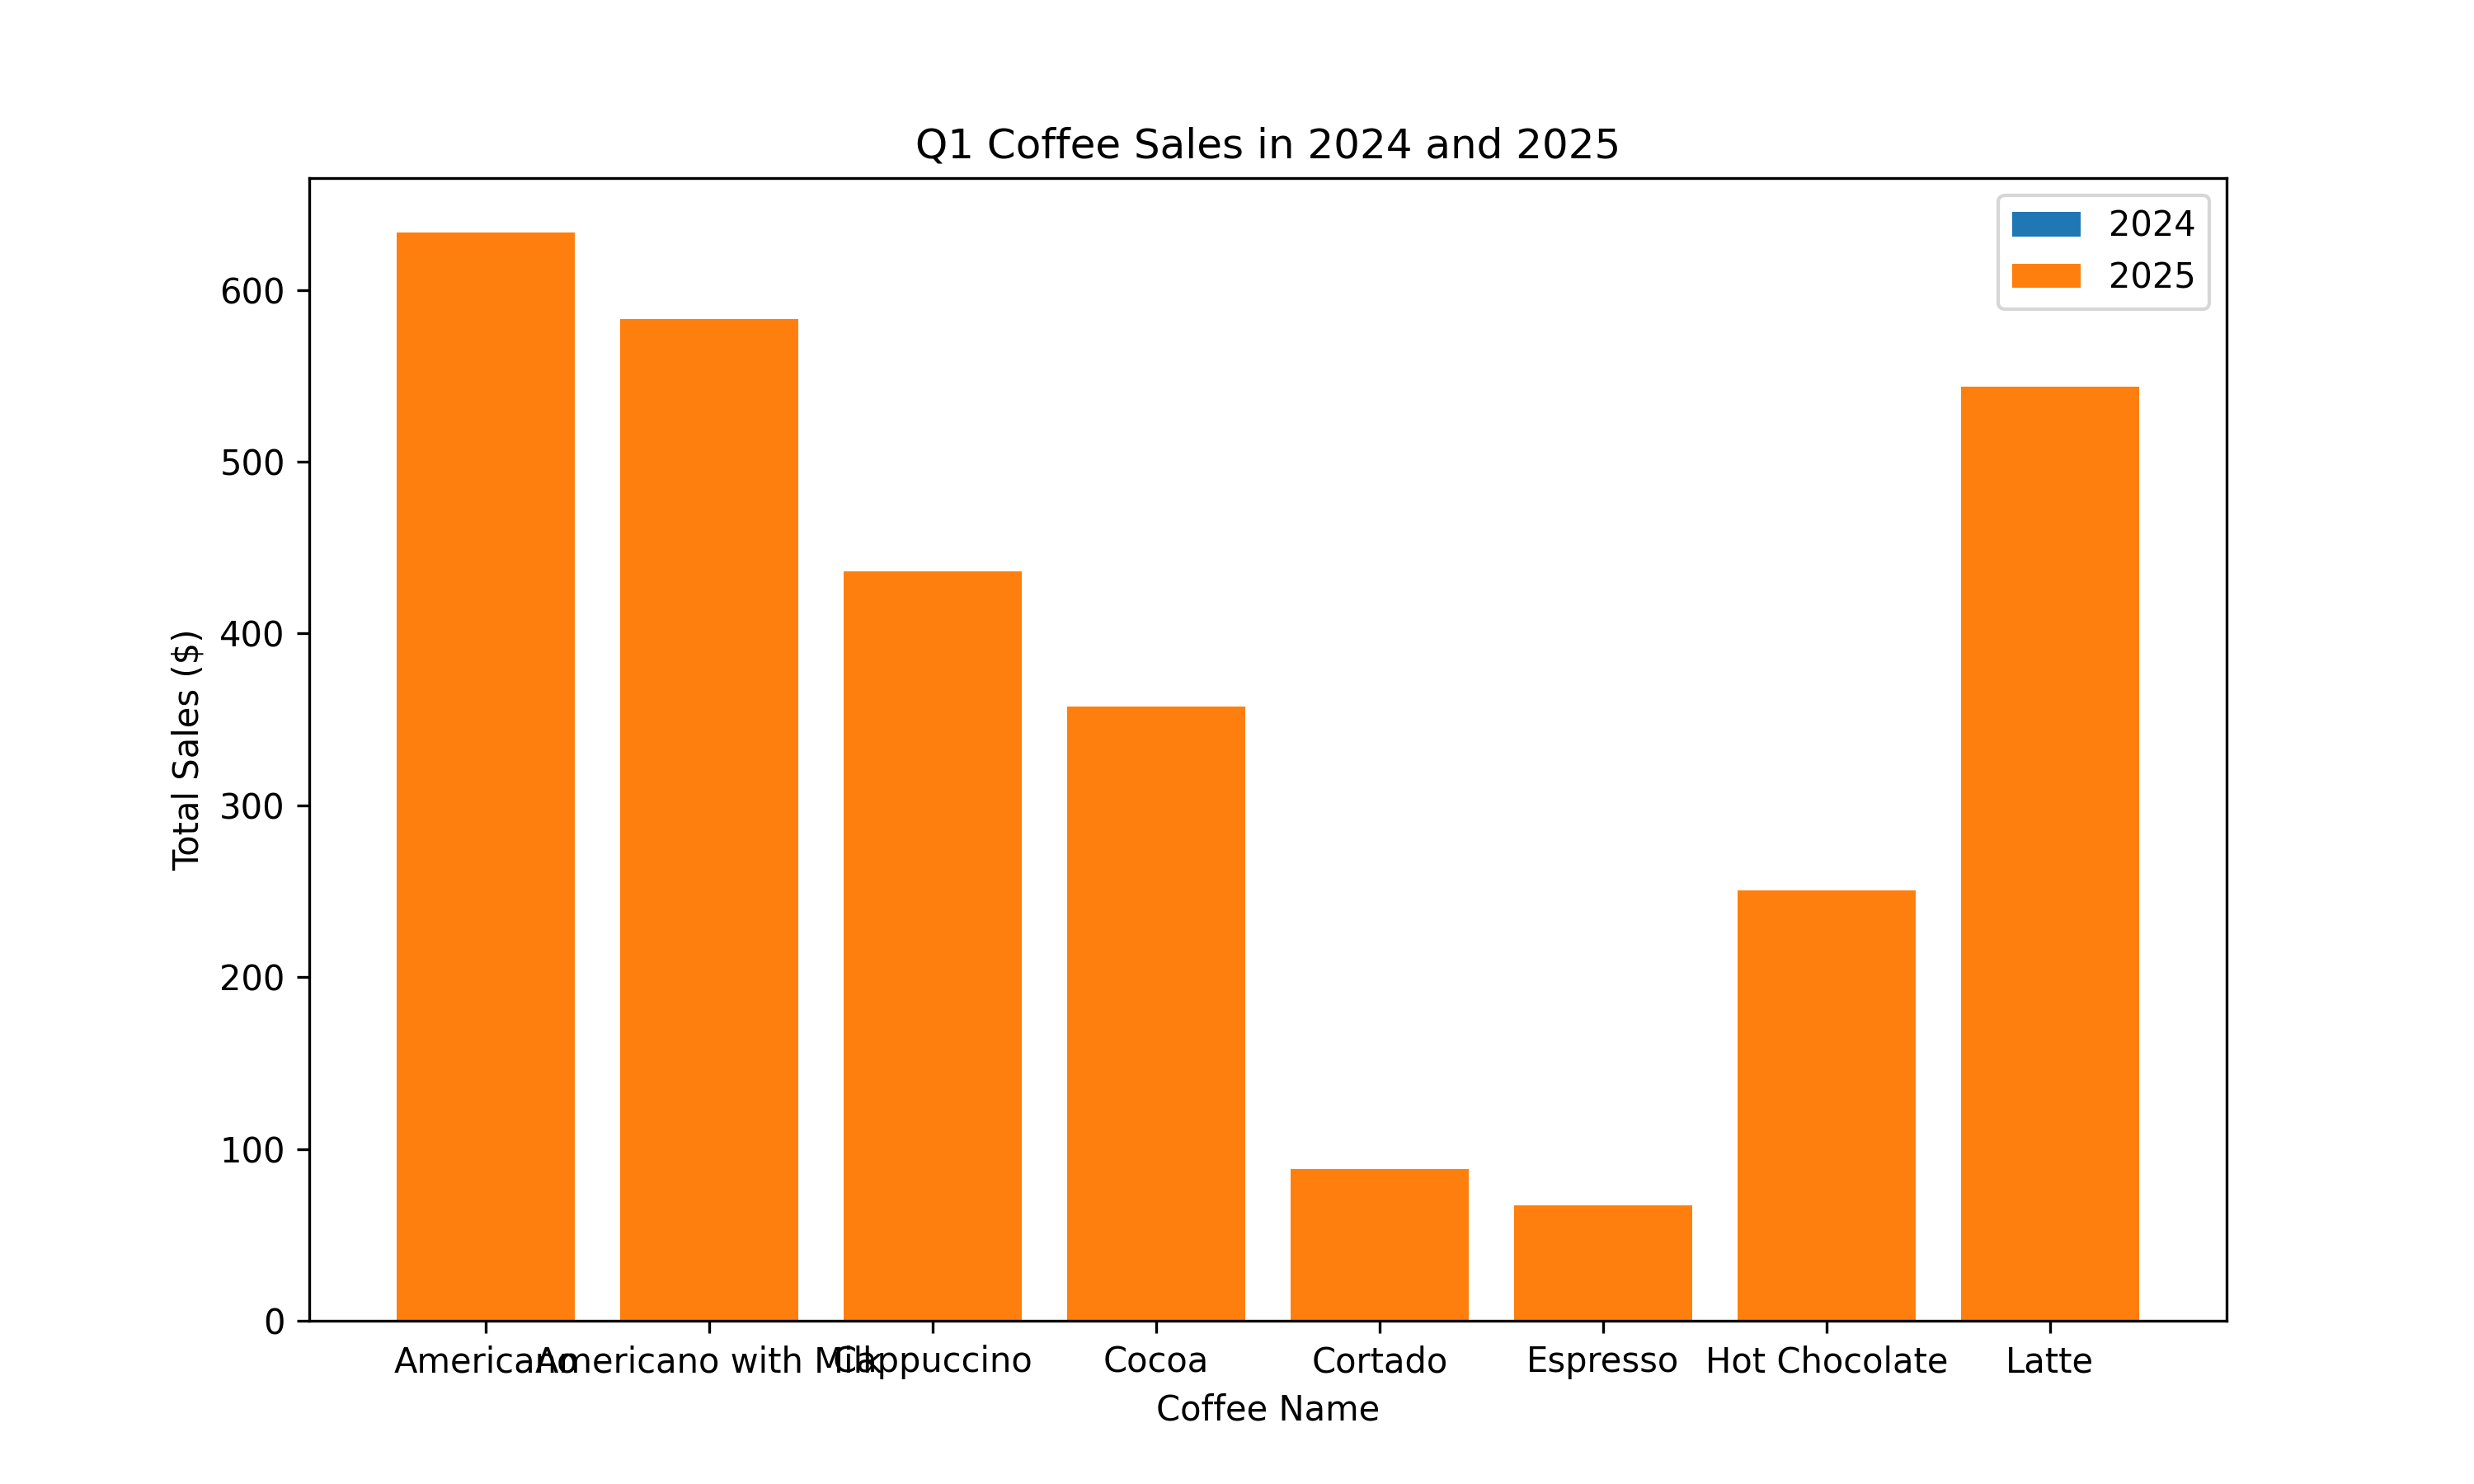

In [121]:
# If code run successfully, the file chart_v1.png should have been generated
utils.print_html(
    content="chart_v1.png",
    title="Generated Chart (V1)",
    is_image=True
)